# Лабораторная работа №10
## Вариант 7

In [1]:
from math import ceil, floor
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as sts

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse


%matplotlib inline

## Задание 1

In [2]:
x, y, coef = make_regression(coef=True, n_samples=110, n_features=2, n_informative=1, noise=12, random_state=7)
print("Сгенерированное уравнение регрессии: ")
print(f"y(х) = {coef[0]:.02f} * x[0] + {coef[1]:.02f} * x[1]")

Сгенерированное уравнение регрессии: 
y(х) = 0.00 * x[0] + 73.14 * x[1]


Признак х[0] является неинформативным, т.к. coef[0] == 0, => значения x[0] не влияют на значение целевого признака y.

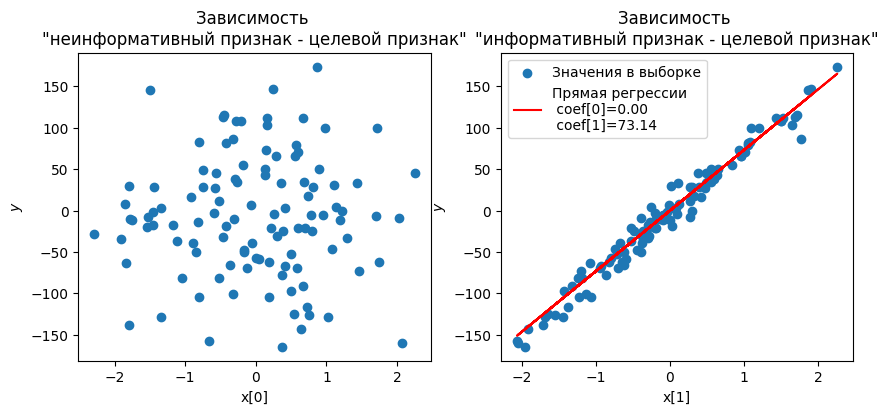

In [3]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

for i, ax in enumerate(axes):
    ax.scatter(x[:, i], y, label="Значения в выборке")
    ax.set_xlabel(f"x[{i}]")
    ax.set_ylabel('$y$')
    
axes[0].set_title('Зависимость \n"неинформативный признак - целевой признак"')
axes[1].set_title('Зависимость \n"информативный признак - целевой признак"')

expected_y = x[:, 0]*coef[0] + x[:, 1]*coef[1]
axes[1].plot(x[:, 1], expected_y, color="r", label=f"Прямая регрессии\n coef[0]={coef[0]:.02f}\n coef[1]={coef[1]:.02f}")
axes[1].legend()
print()

Диаграмма зависимости y от x[0] принимает вид беспорядочного облака точек, что может говорить об отсутствии зависимости.

Диаграмма зависимости у от х[1] принимает вид облака точек, сконцентрированных вдоль возрастающей прямой, с некоторым отклонением. Это может сведетельствовать об наличии прямой линейной зависимости. 

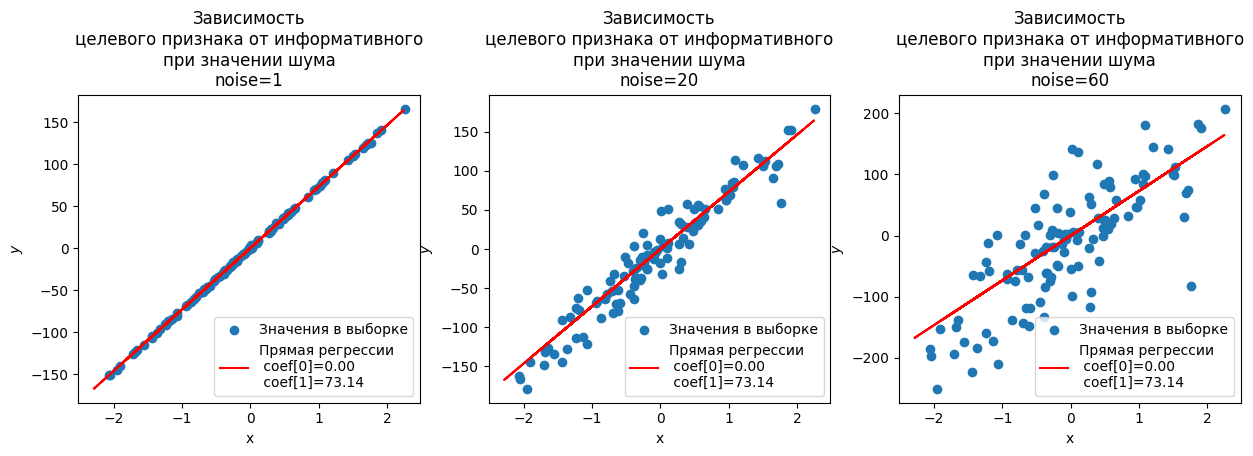

In [4]:
noise = [1, 20, 60]
samples = [make_regression(coef=True, n_samples=110, n_features=2, n_informative=1, noise=i, random_state=7) for i in noise]

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 4))

for i, s in enumerate(samples):

    ax[i].scatter(s[0][:, 1], s[1], label="Значения в выборке")
    expected_y = s[0][:, 0]*s[2][1]
    ax[i].plot(s[0][:, 0], expected_y, color="r", label=f"Прямая регрессии\n coef[0]={s[2][0]:.02f}\n coef[1]={s[2][1]:.02f}")
    ax[i].set_xlabel(f"x")
    ax[i].set_ylabel('$y$')
    ax[i].legend(loc="lower right")
    ax[i].set_title(f"Зависимость\nцелевого признака от информативного\nпри значении шума\nnoise={noise[i]}")


При значении noise=1, влияние шума незначительно - все точки из выборки визуально лежат на прямой регрессии.  
При значении noise=20, влияние шума заметно, но всё ещё можно визуально определить, что точки концентрируются вдоль прямой y(x)=coef*x.  
При значении noise=60, влияние шума велико, тяжело визуально определить вдоль какой именно прямой концентрируются точки. Иными словами существует некоторое множество прямых, для которых могла быть получена данныя диаграмма, с таким значением шума.  

In [5]:
x_train, x_test, y_train, y_test = [], [], [], []

for s in samples:
    split_data = train_test_split(s[0], s[1], test_size=0.3, random_state=7)
    x_train.append(split_data[0])
    x_test.append(split_data[1])
    y_train.append(split_data[2])
    y_test.append(split_data[3])


In [6]:
models = []
print(f"Исходные коэффициенты: {samples[0][2][0]:.02f} {samples[0][2][1]:.02f}",)
for i in range(len(noise)):
    model = LinearRegression()
    model.fit(x_train[i], y_train[i])
    print(f"Полученные коэффициенты: {model.coef_[0]:.02f} {model.coef_[1]:.02f} | Значение шума: {noise[i]}")

    models.append(model)

print(f"\nИсходное уравнение: y(х) = {coef[0]:.02f} * x[0] + {coef[1]:.02f} * x[1]")
for i, model in enumerate(models):
    print(f"Полученное уравнение для значения шума {noise[i]}: y(x) = {model.coef_[0]:.02f} * x[0] + {model.coef_[1]:.02f} * x[1]")


Исходные коэффициенты: 0.00 73.14
Полученные коэффициенты: 0.03 73.20 | Значение шума: 1
Полученные коэффициенты: 0.57 74.38 | Значение шума: 20
Полученные коэффициенты: 1.72 76.85 | Значение шума: 60

Исходное уравнение: y(х) = 0.00 * x[0] + 73.14 * x[1]
Полученное уравнение для значения шума 1: y(x) = 0.03 * x[0] + 73.20 * x[1]
Полученное уравнение для значения шума 20: y(x) = 0.57 * x[0] + 74.38 * x[1]
Полученное уравнение для значения шума 60: y(x) = 1.72 * x[0] + 76.85 * x[1]


Можно заметить:
1) У информативного признака в каждой из моделей вес на порядок(несколько порядков) больше.
2) С ростом уровня шума вес неинформативного признака увеличивается.
3) С ростом уровня шума точность определения коэффициента информативного признака снижается.

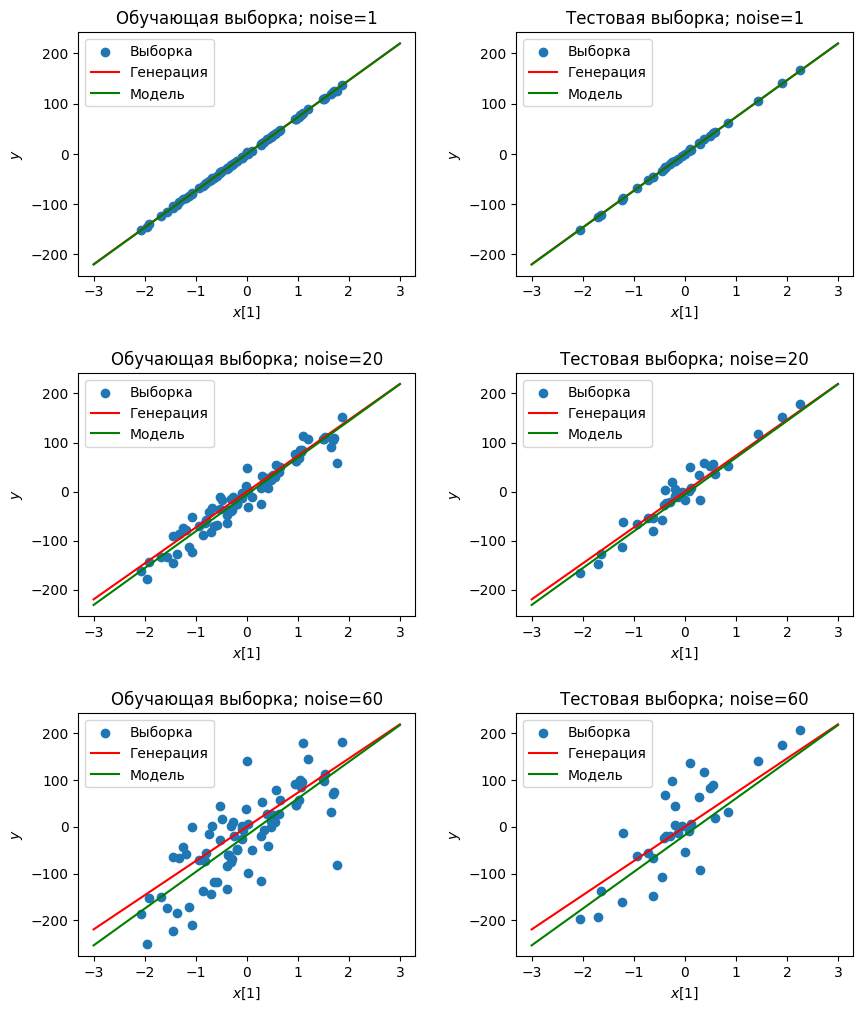

In [7]:
fig, ax = plt.subplots(nrows = len(noise), ncols = 2, figsize = (10, 4*len(noise)))
fig.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(len(noise)):
    ax[i][0].scatter(x_train[i][:, 1], y_train[i], label='Выборка')
    ax[i][0].set_title(f'Обучающая выборка; noise={noise[i]}')

    ax[i][1].scatter(x_test[i][:, 1], y_test[i], label='Выборка')
    ax[i][1].set_title(f'Тестовая выборка; noise={noise[i]}')

    x_ax = [np.linspace(floor(np.min(x[:, i])), ceil(np.max(x[:, i])), 2).reshape(-1, 1) for i in range(2)]
    x_lin = np.hstack(x_ax)

    y_gen = np.dot(x_lin, coef)
    y_mod = np.dot(x_lin, models[i].coef_) + models[i].intercept_
    for j in range(2):
        ax[i][j].plot(x_lin[:, 0], y_gen, 'r', label='Генерация')
        ax[i][j].plot(x_lin[:, 0], y_mod, 'g', label='Модель')
        ax[i][j].set_xlabel('$x[1]$')
        ax[i][j].set_ylabel('$y$')
        ax[i][j].legend(loc=2)


По визуальной оценке полученных резулитатов можно сказать:
1) Обобщающая способность моделей на тестовой и обучающей выборках отличается не существенно.
2) С увеличением уровня шума обобщающая способность падает.
3) С увеличением уровня шума растёт отклонение прямой модели от прямой генерации.

In [8]:
y_train_predict = [np.dot(x_train[i], models[i].coef_) + models[i].intercept_ for i in range(len(noise))]
y_test_predict = [np.dot(x_test[i], models[i].coef_) + models[i].intercept_ for i in range(len(noise))]

print("Ответы: ", y_test)

Ответы:  [array([ -91.38595673,   20.08535975,   29.51391232, -121.0543961 ,
          6.20915234, -150.92291295,   20.72217867,  -13.79619094,
        -33.71396205,  -20.54244491,   42.9790843 ,   -3.22762415,
        -52.06954889,  -26.70305044,  -46.84433688,   41.36550748,
        -16.92755802,  -29.55584173, -126.09159819,  -67.8963632 ,
         -9.73884307,  -86.81338778,  -26.33611595,  -13.35743712,
         10.08509002,  104.96671906,   60.98953012,   36.3784694 ,
        140.4456166 ,  165.99910482,  -46.09873031,   -0.96248489,
          8.4699173 ]), array([-113.49037975,  -16.14850705,   57.85364428, -126.58746565,
          1.67411019, -165.90981068,   34.44553063,   -7.91250265,
        -57.74721905,  -20.19311087,   35.31123844,   -1.47949788,
        -53.24004553,    3.94753673,  -79.55003963,   56.60965175,
         20.43115896,  -27.97150966, -147.75223869,  -66.44555863,
        -10.812213  ,  -62.7629184 ,  -24.11170938,    5.27049775,
         50.7131118 ,  116.6

In [114]:
print("Предсказания: ", y_test_predict)

Предсказания:  [array([ -90.59241822,   21.74706463,   27.81151262, -121.14877218,
          6.11626097, -150.50084026,   19.69657737,  -14.46743975,
        -32.78021726,  -20.92095072,   43.11195202,   -3.66273122,
        -52.33652994,  -28.5809544 ,  -45.47029926,   40.30221506,
        -19.17603998,  -30.02853537, -125.40757593,  -68.31721642,
         -9.99819206,  -88.41066145,  -26.75180936,  -14.66567761,
          7.69581863,  104.14732559,   61.24105375,   35.28657269,
        139.67534285,  165.16312828,  -46.08759236,   -0.41416913,
          8.18082672]), array([ -97.61960951,   17.08559067,   23.80565024, -128.47498728,
         -0.18371724, -157.4683568 ,   13.93350458,  -21.33747879,
        -39.07232321,  -27.76322709,   37.96859283,  -10.18163911,
        -58.57966655,  -33.61054238,  -52.0692874 ,   35.34380338,
        -24.53848015,  -37.42538259, -134.07179356,  -74.86262293,
        -15.99919284,  -94.70839188,  -32.42557768,  -20.89431207,
          2.92768392, 

Предсказанные значения отличаются от ответов. Для более детального сопоставления нужно посчитать метрики.

In [138]:
print("Для объекта №7")
print("Уровень шума: ", noise)
print("Ответы......: ", [round(y_test[i][7], 2) for i in range(len(noise))])
print("Предсказания: ", [round(y_test_predict[i][7], 2) for i in range(len(noise))])
print("Метрика MSE.: ", [round(mse([y_test[i][7]], [y_test_predict[i][7]]), 2) for i in range(len(noise))])

Для объекта №7
Уровень шума:  [1, 20, 60]
Ответы......:  [-13.8, -7.91, 4.47]
Предсказания:  [-14.47, -21.34, -35.8]
Метрика MSE.:  [0.45, 180.23, 1622.07]


С увеличением уровня шума разница между ответом и предсказанным значением увеличивается, значение матрики увеличивается с квадратичной скоростью.

In [141]:
mse_train = [round(mse(y_train[i], y_train_predict[i]), 2) for i in range(len(noise))]
mse_test = [round(mse(y_test[i], y_test_predict[i]), 2) for i in range(len(noise))]
print("MSE на тренировочной выборке: ", mse_train)
print("MSE на тестовой выборке.....: ", mse_test)

MSE на тренировочной выборке:  [0.93, 371.04, 3339.32]
MSE на тестовой выборке.....:  [1.08, 431.09, 3879.79]


1) С увеличением уровня шума качество модели снижается.
2) Для значений шума noise=[1, 20] качество предсказаний на тестовой выборке ухудшилось не сильно, что свидетельствует о хорошей обощающей способности полученных моделей.
3) Для значения шума noise=60 качество предсказаний на тестовой выборке заметно ухудшилось, что свидетелоьствует о низкой обобщающей способности полученной модели.



## Задание 2

In [26]:
df = pd.read_csv("Lab_10/Вариант№7.csv")
df.head()

,Weight,Height
0,116.4621,64.86316
1,139.5891,67.91753
2,138.0376,67.84233
3,124.8913,69.38148
4,127.2921,66.94613


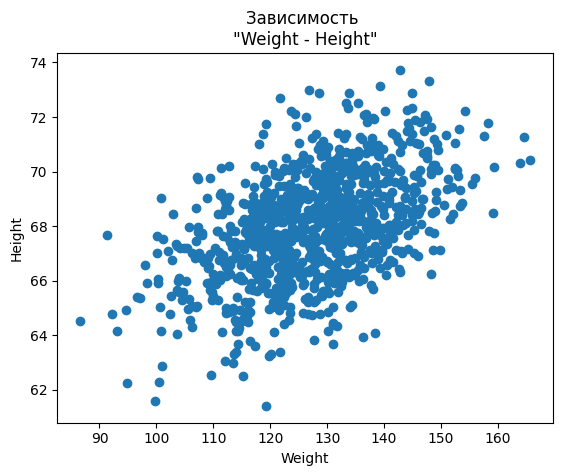

In [22]:
plt.scatter(df.Weight, df.Height, label="Значения в выборке")
plt.xlabel("Weight")
plt.ylabel('Height')
plt.title('Зависимость \n"Weight - Height"')
None

Облако точек имеет форму прямоугольника, что может свидетельствовать о линейной связи с большим уровнем шума.

/tmp/ipykernel_16944/3594710107.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name], kde=False, fit=sts.lognorm, ax=ax[i], hist_kws={'label':'гистограмма относительных частот'}, fit_kws={'label':'плотность теоретического распределения'})


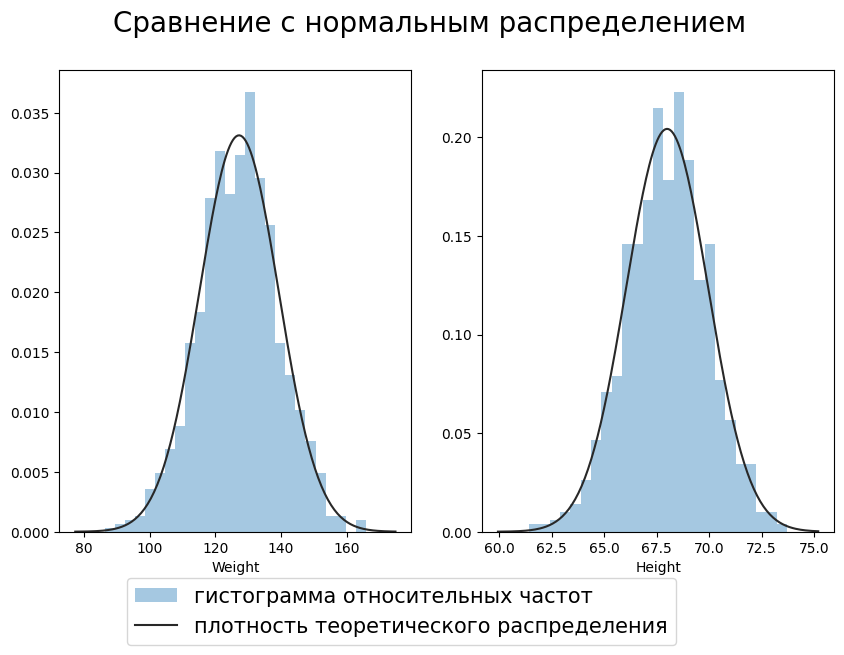

In [23]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 6)
fig.suptitle('Сравнение с нормальным распределением ', fontsize=20)
    
for i, column_name in enumerate(df.columns):
    x = np.linspace(min(df[column_name]), max(df[column_name]), 1000)
    sns.distplot(df[column_name], kde=False, fit=sts.lognorm, ax=ax[i], hist_kws={'label':'гистограмма относительных частот'}, fit_kws={'label':'плотность теоретического распределения'})
ax[0].legend(bbox_to_anchor=(1.75 , -0.1 ), borderaxespad= 0, fontsize=15)

Визуально распределение признаков близко к нормальному. Для определения выбросов можно использовать диаграмму "ящик с усами".

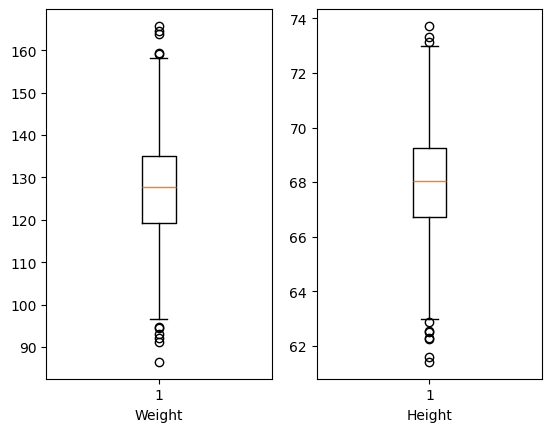

In [24]:
fig, ax = plt.subplots(1, 2)

for i, column_name in enumerate(df.columns):
    ax[i].boxplot(df[column_name],)
    ax[i].set_xlabel(column_name)


В выборке присутствует небольшое число выбросов. Избавимся от них для улучшения качества модели.

Text(0.5, 1.0, 'Диаграмма рассеяния исправленных данных')

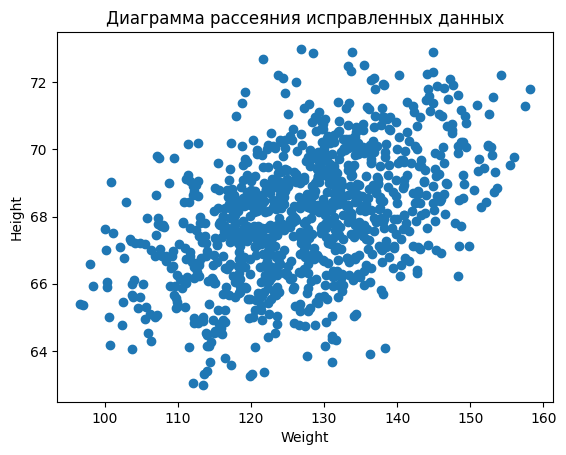

In [27]:
def filterr(df, colums):
    ix = set(df.index)
    for column_name in colums:
        q1 = np.quantile(df[column_name], 0.25)
        q3 = np.quantile(df[column_name], 0.75)

        q = q1 - 1.5*(q3 - q1), q3 + 1.5*(q3 - q1) 
        ix = ix & set(df[(df[column_name] >= q[0]) & (df[column_name] <= q[1])].index)
        
    return df[df.index.isin(ix)]
f_df = filterr(df, df.columns)

plt.scatter(f_df.Weight, f_df.Height)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Диаграмма рассеяния исправленных данных")


In [28]:
cor = sts.pearsonr(f_df.Weight, f_df.Height)
print(f"Коэффициент корреляции Пирсона: {cor[0]:.02f}")
print(f"p-value: {cor[1]:.02f}")

Коэффициент корреляции Пирсона: 0.47
p-value: 0.00


Судя по значеению коэффициента корреляции и p-value можно сказать, что наблюдается умеренная корреляция признаков. Вероятно присутствует прямая линейная связь.

In [29]:
df.Weight.apply(np.int64)
df.Height.apply(np.int64)
x = np.array(f_df.Weight).reshape(-1, 1)
y = np.array(f_df.Height).reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=7)

model = LinearRegression()
model.fit(x_train, y_train)
print("Вес признака ", *model.coef_)
print("Bias ", *model.intercept_)

print(f"Полученное уравнение: Height(Weight) = {model.coef_[0][0]:.02f} * Weight + {model.intercept_[0]:.02f}")

Вес признака  [0.07828599]
Bias  58.05922612737868
Полученное уравнение: Height(Weight) = 0.08 * Weight + 58.06


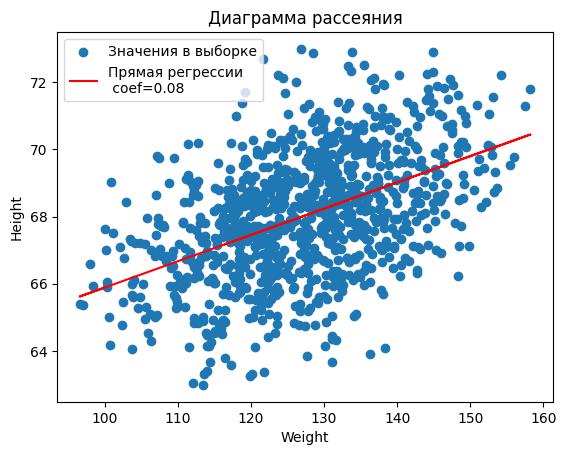

In [30]:
plt.scatter(x, y, label="Значения в выборке")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Диаграмма рассеяния")

expected_y = np.dot(x, model.coef_) + model.intercept_

plt.plot(x, expected_y, color="r", label=f"Прямая регрессии\n coef={model.coef_[0][0]:.02f}")
plt.legend()
print()


Для признаков с данным значением шума модель достаточно неплохо описывает зависимость

In [31]:

y_train_predict = np.dot(y_train, model.coef_) + model.intercept_
y_test_predict = np.dot(x_test, model.coef_) + model.intercept_
mse_train = round(mse(y_train, y_train_predict), 2)
mse_test = round(mse(y_test, y_test_predict), 2)
print("MSE на тренировочной выборке: ", mse_train)
print("MSE на тестовой выборке.....: ", mse_test)

MSE на тренировочной выборке:  24.52
MSE на тестовой выборке.....:  2.6


Качество предсказаний на тестовой выборке не ухудшилось, что свидетельствует о хорошей обобщающей способности.